## Gyre Circulation

This notebook for computing barotrpic transport in gyres in the North Atlantic. The barotrpic transport is computed using the meridional velocity $v$ as 

$$\psi(x,y) = \int_{x_w}^{x}\int_{-H}^{0}v(x,y)dzdx$$

In [1]:
import numpy as np
import scipy as sc
import xarray as xr
from xgcm import Grid

import warnings
warnings.filterwarnings('ignore')

In [5]:
# read test data and grid information

def select_subset(dataset):
    
    """Select subset of dataset in xr.open_mfdataset command
    """
    dataset = dataset.isel(i=slice(749,1199), j = slice(699, 1149)) # indices range
    dataset = dataset.drop(['vertices_latitude', 'vertices_longitude', 
                            'time_bnds']) # drop variables 
    
    return dataset

ppdir="/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/"

year, r = (1960, 1)

var_path = ppdir + "s" + str(year) +"-r" + str(r+1) + "i1p1f2/Omon/vo/gn/latest/*.nc"

with xr.open_mfdataset(var_path, preprocess=select_subset, chunks={'time':1}, engine='netcdf4') as ds:
    ds = ds

In [2]:
ds_grid = xr.open_dataset("/home/users/hkhatri/DePreSys4_Data/Data_Consolidated/Ocean_Area_Updated.nc")

#ds_grid = ds_grid.get(['dz_t', 'dx_v']).rename({'yv':'j', 'x':'i', 'deptht':'lev'})

print(ds_grid)

In [12]:
ds1 = xr.merge([ds.rename({'j':'j_c'}), ds_grid.rename({'y':'j', 'x':'i', 'yv':'j_c', 'xu':'i_c', 'deptht':'lev'})])

print(ds1)

<xarray.Dataset>
Dimensions:    (j_c: 450, i: 450, time: 125, lev: 75, bnds: 2, j: 450,
                depthw: 75, i_c: 450)
Coordinates:
  * j_c        (j_c) int64 699 700 701 702 703 704 ... 1144 1145 1146 1147 1148
  * i          (i) int64 749 750 751 752 753 754 ... 1194 1195 1196 1197 1198
  * time       (time) object 1960-11-16 00:00:00 ... 1971-03-16 00:00:00
  * lev        (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    latitude   (j_c, i) float32 dask.array<chunksize=(450, 450), meta=np.ndarray>
    longitude  (j_c, i) float32 dask.array<chunksize=(450, 450), meta=np.ndarray>
    nav_lat    (j, i) float32 ...
    nav_lon    (j, i) float32 ...
  * depthw     (depthw) float32 0.0 1.024 2.103 ... 5.393e+03 5.596e+03 5.8e+03
Dimensions without coordinates: bnds, j, i_c
Data variables: (12/17)
    lev_bnds   (time, lev, bnds) float64 dask.array<chunksize=(2, 75, 2), meta=np.ndarray>
    vo         (time, lev, j_c, i) float32 dask.array<chunksize=(1, 75, 450, 450), met

### Read North Atlantic mask information

This is to ensure that only data within North Atlantic region is used for gyre transport calculation.

In [10]:
ds_mask = xr.open_dataset("/home/users/hkhatri/DePreSys4_Data/Data_Consolidated/Mask_UV_grid.nc")

print(ds_mask)

<xarray.Dataset>
Dimensions:           (j_c: 450, i: 450, j: 450, i_c: 450)
Coordinates:
    nav_lat           (j_c, i) float32 ...
    nav_lon           (j_c, i) float32 ...
Dimensions without coordinates: j_c, i, j, i_c
Data variables:
    mask_North_Atl_v  (j_c, i) float64 ...
    mask_North_Atl_u  (j, i_c) float64 ...


In [18]:
ds1 = xr.merge([ds1, ds_mask.drop(['nav_lat', 'nav_lon'])])

In [19]:
ds1

<xarray.Dataset>
Dimensions:           (j_c: 450, i: 450, time: 125, lev: 75, bnds: 2, j: 450,
                       depthw: 75, i_c: 450)
Coordinates:
  * j_c               (j_c) int64 699 700 701 702 703 ... 1145 1146 1147 1148
  * i                 (i) int64 749 750 751 752 753 ... 1194 1195 1196 1197 1198
  * time              (time) object 1960-11-16 00:00:00 ... 1971-03-16 00:00:00
  * lev               (lev) float64 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    latitude          (j_c, i) float32 dask.array<chunksize=(450, 450), meta=np.ndarray>
    longitude         (j_c, i) float32 dask.array<chunksize=(450, 450), meta=np.ndarray>
    nav_lat           (j, i) float32 ...
    nav_lon           (j, i) float32 ...
  * depthw            (depthw) float32 0.0 1.024 2.103 ... 5.596e+03 5.8e+03
Dimensions without coordinates: bnds, j, i_c
Data variables: (12/19)
    lev_bnds          (time, lev, bnds) float64 dask.array<chunksize=(2, 75, 2), meta=np.ndarray>
    vo                (time, lev, j_c, i) float32 dask.array<chunksize=(1, 75, 450, 450), meta=np.ndarray>
    dz_t              (lev) float32 1.024 1.079 1.148 ... 203.2 203.8 204.2
    dx_v              (j_c, i) float32 2.78e+04 2.78e+04 ... 5.182e+03 5.157e+03
    area_t            (j, i) float32 ...
    dz_w              (depthw) float32 ...
    ...                ...
    nav_lat_u         (j, i_c) float32 ...
    nav_lat_v         (j_c, i) float32 ...
    nav_lon_u         (j, i_c) float32 ...
    nav_lon_v         (j_c, i) float32 ...
    mask_North_Atl_v  (j_c, i) float64 ...
    mask_North_Atl_u  (j, i_c) float64 ...
Attributes: (12/42)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            DCPP
    branch_method:          no parent
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2020-11-18T15:35:31Z
    ...                     ...
    tracking_id:            hdl:21.14100/d86c22f2-846c-449b-9501-d91b4e2c71ea
    variable_id:            vo
    variable_name:          vo
    variant_label:          r2i1p1f2
    license:                CMIP6 model data produced by Met Office Hadley Ce...
    cmor_version:           3.4.0

In [26]:
grid = Grid(ds1, coords={'X': {'center': 'i', 'right': 'i_c'},
                        'Y': {'center': 'j', 'right': 'j_c'} }, periodic=[])

tmp = ds1['vo'].isel(time=0).load()

tmp_intz = (tmp * ds1['dz_t']).sum('lev')

In [61]:
dx = ds1['dx_v'].where(ds1['mask_North_Atl_v'] == 0.)

psi = (tmp_intz * dx).cumsum(dim = 'i')

#psi = grid.cumsum(tmp_intz.drop(['time', 'i', 'j_c']) * dx.drop(['i','j_c']), 'X', boundary='fill') # not working for some reason

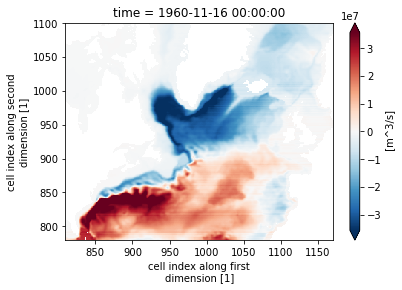

In [68]:
#ds1['vo'].isel(time=0, lev=0).plot(robust=True)

psi.where(ds1['mask_North_Atl_v'] == 0.).sel(j_c=slice(780, 1100),i=slice(810,1170)).plot(robust=True)

In [64]:
psi

<xarray.DataArray (j_c: 450, i: 450)>
array([[      0.  ,       0.  ,       0.  , ..., 1382420.6 , 1382420.6 ,
        1382420.6 ],
       [      0.  ,       0.  ,       0.  , ...,  672099.1 ,  672099.1 ,
         672099.1 ],
       [      0.  ,       0.  ,       0.  , ..., 1681397.5 , 1681397.5 ,
        1681397.5 ],
       ...,
       [      0.  ,       0.  ,       0.  , ..., -417991.28, -417991.28,
        -417991.28],
       [      0.  ,       0.  ,       0.  , ..., -383277.03, -383277.03,
        -383277.03],
       [      0.  ,       0.  ,       0.  , ..., -358173.94, -358173.94,
        -358173.94]], dtype=float32)
Coordinates:
  * j_c        (j_c) int64 699 700 701 702 703 704 ... 1144 1145 1146 1147 1148
  * i          (i) int64 749 750 751 752 753 754 ... 1194 1195 1196 1197 1198
    time       object 1960-11-16 00:00:00
    latitude   (j_c, i) float32 4.121 4.121 4.121 4.121 ... 73.47 73.36 73.26
    longitude  (j_c, i) float32 -99.75 -99.5 -99.25 -99.0 ... 51.27 51.43 51.59

In [69]:
psi.attrs['units'] = "m^3/s"

d = psi.to_dataset(name='Psi')

d = d.rename({'j_c':'j'})

d

<xarray.Dataset>
Dimensions:    (j: 450, i: 450)
Coordinates:
  * j          (j) int64 699 700 701 702 703 704 ... 1144 1145 1146 1147 1148
  * i          (i) int64 749 750 751 752 753 754 ... 1194 1195 1196 1197 1198
    time       object 1960-11-16 00:00:00
    latitude   (j, i) float32 4.121 4.121 4.121 4.121 ... 73.47 73.36 73.26
    longitude  (j, i) float32 -99.75 -99.5 -99.25 -99.0 ... 51.27 51.43 51.59
Data variables:
    Psi        (j, i) float32 0.0 0.0 0.0 ... -3.582e+05 -3.582e+05 -3.582e+05